In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from joblib import Parallel, delayed

In [3]:
def integral_exp_x(n, a, b):
    u = np.random.uniform(a, b, n)
    return np.mean(np.exp(u)) * (b - a)

def area_circulo(n):
    x = np.random.uniform(0, 1, n)
    y = np.random.uniform(0, 1, n)
    return 4 * np.mean((x**2 + y**2) <= 1)

def integral_dupla_gauss(n):
    u = np.random.uniform(0, 1, n)
    v = np.random.uniform(0, 1, n)
    return np.mean(np.exp(-(u**2 + v**2)))

def integral_generica(n, funcao_g):
    u = np.random.uniform(0, 1, n)
    x_transf = -np.log(u)
    return np.mean(funcao_g(x_transf))

def g_inv_exp(x): return np.exp(-x)
def g_racional(x): return 1 / (1 + x)
def g_seno_amortecido(x): return np.sin(x) / (x * np.exp(-x))

print(integral_generica(1000, g_inv_exp))

0.4968034039390279


In [4]:
def calcular_ic_paralelo(funcao_alvo, n_amostra, m_reps):
    resultados = Parallel(n_jobs=-1)(
        delayed(funcao_alvo)(n_amostra) for _ in range(m_reps)
    )
    media = np.mean(resultados)
    erro = 1.96 * np.std(resultados, ddof=1) / np.sqrt(m_reps)
    return media - erro, media + erro

ic_pi = calcular_ic_paralelo(area_circulo, 1000, 1000)
print(ic_pi)

(np.float64(3.1406691320370945), np.float64(3.1468988679629057))


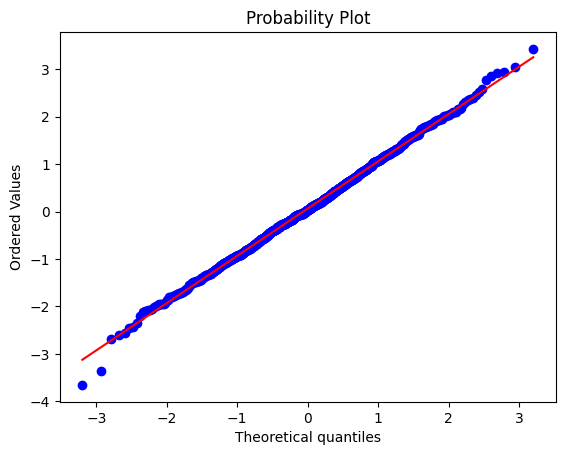

In [5]:
def gerar_normal_rejeicao():
    while True:
        u1 = np.random.uniform()
        y = -np.log(u1)
        u2 = np.random.uniform()
        if u2 <= np.exp(-0.5 * (y - 1)**2):
            u_sinal = np.random.uniform()
            return y if u_sinal > 0.5 else -y

amostra_z = [gerar_normal_rejeicao() for _ in range(1000)]
stats.probplot(amostra_z, dist="norm", plot=plt)
plt.show()

In [ ]:
eixo_n = np.arange(1, 101)
limite_teorico = np.sqrt(2 * np.log(eixo_n))

def simular_maximos(n, reps=100):
    maximos = []
    for _ in range(reps):
        amostra = [gerar_normal_rejeicao() for _ in range(n)]
        maximos.append(np.max(amostra))
    return np.mean(maximos)

resultado_simulado = Parallel(n_jobs=-1)(
    delayed(simular_maximos)(n) for n in eixo_n
)

plt.plot(eixo_n, limite_teorico, label='Teórico')
plt.plot(eixo_n, resultado_simulado, label='Simulado (Joblib)')
plt.legend()
plt.show()